#📌 Extracão

In [1]:
import pandas as pd
import requests

# link para o arquivo
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"

# Carregando dados
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)

# criando o dataframe normalizando as colunas
customer_df = pd.json_normalize(df['customer'])
phone_df    = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df  = pd.json_normalize(df['account'])

# Concatenando tudo em um único DataFrame
df = pd.concat([df[['customerID','Churn']], customer_df, phone_df, internet_df, account_df], axis=1)

# Verificando resultados com print e info
print(df.head())
print(df.info())


   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1       

#🔧 Transformação

In [2]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


Dicionário de dados

customerID: número de identificação único de cada cliente

Churn: se o cliente deixou ou não a empresa

gender: gênero (masculino e feminino)

SeniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos

Partner: se o cliente possui ou não um parceiro ou parceira

Dependents: se o cliente possui ou não dependentes

tenure: meses de contrato do cliente

PhoneService: assinatura de serviço telefônico

MultipleLines: assisnatura de mais de uma linha de telefone

InternetService: assinatura de um provedor internet

OnlineSecurity: assinatura adicional de segurança online

OnlineBackup: assinatura adicional de backup online

DeviceProtection: assinatura adicional de proteção no dispositivo

TechSupport: assinatura adicional de suporte técnico, menos tempo de espera

StreamingTV: assinatura de TV a cabo

StreamingMovies: assinatura de streaming de filmes

Contract: tipo de contrato

PaperlessBilling: se o cliente prefere receber online a fatura

PaymentMethod: forma de pagamento

Charges.Monthly: total de todos os serviços do cliente por mês

Charges.Total: total gasto pelo cliente

Creio que as colunas mais importantes sejam por tipo:

relacionamento: tenure, Contract, PaperlessBilling, PaymentMethod

serviços: InternetService, OnlineSecurity, TechSupport, StreamingTV, StreamingMovies

financeiras: Charges.Monthly, Charges.Total

In [3]:
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [4]:
# Contagem de valores Nan por coluna
print(df.isnull().sum())

# Verificando valores "estranhos" que podem estar como string vazia ou espaço
for col in df.columns:
    print(f"{col}: valores únicos -> {df[col].unique()[:10]}")


customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64
customerID: valores únicos -> ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' '0013-EXCHZ'
 '0013-MHZWF' '0013-SMEOE' '0014-BMAQU' '0015-UOCOJ' '0016-QLJIS']
Churn: valores únicos -> ['No' 'Yes' '']
gender: valores únicos -> ['Female' 'Male']
SeniorCitizen: valores únicos -> [0 1]
Partner: valores únicos -> ['Yes' 'No']
Dependents: valores únicos -> ['Yes' 'No']
tenure: valores únicos -> [ 9  4 13  3 71 63  7 65 54 72]
PhoneService: valores únicos -> ['Yes' 'No']
MultipleLines: valores únicos -> ['No' 'Yes' 'No pho

In [5]:
# Verifica registros duplicados pelo ID do cliente
print("Duplicados:", df.duplicated(subset=['customerID']).sum())

Duplicados: 0


In [6]:
# Padronizando formatação das strings (Yes/No, categorias de contrato etc.)
for col in df.select_dtypes(include='object'):
    df[col] = df[col].str.strip().str.title()

In [7]:
# Inspecionar valores únicos nas colunas categóricas
categorical_cols = ['Churn','gender','Partner','Dependents',
                    'PhoneService','MultipleLines','InternetService',
                    'OnlineSecurity','OnlineBackup','DeviceProtection',
                    'TechSupport','StreamingTV','StreamingMovies',
                    'Contract','PaperlessBilling','PaymentMethod']

for col in categorical_cols:
    print(f"\n{col} -> {df[col].unique()}")



Churn -> ['No' 'Yes' '']

gender -> ['Female' 'Male']

Partner -> ['Yes' 'No']

Dependents -> ['Yes' 'No']

PhoneService -> ['Yes' 'No']

MultipleLines -> ['No' 'Yes' 'No Phone Service']

InternetService -> ['Dsl' 'Fiber Optic' 'No']

OnlineSecurity -> ['No' 'Yes' 'No Internet Service']

OnlineBackup -> ['Yes' 'No' 'No Internet Service']

DeviceProtection -> ['No' 'Yes' 'No Internet Service']

TechSupport -> ['Yes' 'No' 'No Internet Service']

StreamingTV -> ['Yes' 'No' 'No Internet Service']

StreamingMovies -> ['No' 'Yes' 'No Internet Service']

Contract -> ['One Year' 'Month-To-Month' 'Two Year']

PaperlessBilling -> ['Yes' 'No']

PaymentMethod -> ['Mailed Check' 'Electronic Check' 'Credit Card (Automatic)'
 'Bank Transfer (Automatic)']


fazendo a limpeza

In [8]:
import pandas as pd

# Tratando valores vazios na coluna Churn
df['Churn'] = df['Churn'].replace('', pd.NA)

# Convertendo Charges.Total para float
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

# Padronizando strings em todas as colunas categóricas
categorical_cols = ['Churn','gender','Partner','Dependents',
                    'PhoneService','MultipleLines','InternetService',
                    'OnlineSecurity','OnlineBackup','DeviceProtection',
                    'TechSupport','StreamingTV','StreamingMovies',
                    'Contract','PaperlessBilling','PaymentMethod']

for col in categorical_cols:
    df[col] = df[col].str.strip().str.title()

# Tratando categorias especiais
# Serviços de internet sem serviço → "No"
internet_related = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for col in internet_related:
    df[col] = df[col].replace('No Internet Service', 'No')

# MultipleLines sem serviço de telefone → "No"
df['MultipleLines'] = df['MultipleLines'].replace('No Phone Service', 'No')

# Padronizando contratos (opcional, remove hifens e mantém consistência)
df['Contract'] = df['Contract'].str.replace('-', ' ', regex=False)

# Conferindo se ainda existem valores ausentes
print(df.isnull().sum())


customerID            0
Churn               224
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Charges.Monthly       0
Charges.Total        11
dtype: int64


In [9]:
#removendo os valores Nan
df = df.dropna()
df.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [10]:
# Criando coluna Contas_Diarias
df['Contas_Diarias'] = df['Charges.Monthly'] / 30

# Verificar resultado
print(df[['customerID','Charges.Monthly','Contas_Diarias']].head())


   customerID  Charges.Monthly  Contas_Diarias
0  0002-Orfbo             65.6        2.186667
1  0003-Mknfe             59.9        1.996667
2  0004-Tlhlj             73.9        2.463333
3  0011-Igkff             98.0        3.266667
4  0013-Exchz             83.9        2.796667


In [11]:
bin_cols = ['Churn','Partner','Dependents','PhoneService','PaperlessBilling',
            'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
            'StreamingTV','StreamingMovies']

for col in bin_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [12]:
df.rename(columns={
    'gender': 'Genero',
    'SeniorCitizen': 'Idoso',
    'tenure': 'Tempo_Contrato_Meses',
    'MultipleLines': 'Linhas_Adicionais',
    'InternetService': 'Tipo_Internet',
    'Contract': 'Tipo_Contrato',
    'PaymentMethod': 'Metodo_Pagamento',
    'Charges.Monthly': 'Faturamento_Mensal',
    'Charges.Total': 'Faturamento_Total',
    'Contas_Diarias': 'Faturamento_Diario'
}, inplace=True)


In [13]:
categorical_cols = ['Genero','Tipo_Internet','Tipo_Contrato','Metodo_Pagamento']
for col in categorical_cols:
    df[col] = df[col].str.strip().str.title()
df

,customerID,Churn,Genero,Idoso,Partner,Dependents,Tempo_Contrato_Meses,PhoneService,Linhas_Adicionais,Tipo_Internet,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Tipo_Contrato,PaperlessBilling,Metodo_Pagamento,Faturamento_Mensal,Faturamento_Total,Faturamento_Diario
0,0002-Orfbo,0,Female,0,1,1,9,1,No,Dsl,...,0,1,1,0,One Year,1,Mailed Check,65.60,593.30,2.186667
1,0003-Mknfe,0,Male,0,0,0,9,1,Yes,Dsl,...,0,0,0,1,Month To Month,0,Mailed Check,59.90,542.40,1.996667
2,0004-Tlhlj,1,Male,0,0,0,4,1,No,Fiber Optic,...,1,0,0,0,Month To Month,1,Electronic Check,73.90,280.85,2.463333
3,0011-Igkff,1,Male,1,1,0,13,1,No,Fiber Optic,...,1,0,1,1,Month To Month,1,Electronic Check,98.00,1237.85,3.266667
4,0013-Exchz,1,Female,1,1,0,3,1,No,Fiber Optic,...,0,1,1,0,Month To Month,1,Mailed Check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-Lutyd,0,Female,0,0,0,13,1,No,Dsl,...,0,1,0,0,One Year,0,Mailed Check,55.15,742.90,1.838333
7263,9992-Rramn,1,Male,0,1,0,22,1,Yes,Fiber Optic,...,0,0,0,1,Month To Month,1,Electronic Check,85.10,1873.70,2.836667
7264,9992-Ujoel,0,Male,0,0,0,2,1,No,Dsl,...,0,0,0,0,Month To Month,1,Mailed Check,50.30,92.75,1.676667
7265,9993-Lhieb,0,Male,0,1,1,67,1,No,Dsl,...,1,1,0,1,Two Year,0,Mailed Check,67.85,4627.65,2.261667


#📊 Carga e análise

In [14]:
numerical_cols = ['Idoso', 'Tempo_Contrato_Meses', 'Faturamento_Mensal', 'Faturamento_Total', 'Faturamento_Diario']

df[numerical_cols].describe()

,Idoso,Tempo_Contrato_Meses,Faturamento_Mensal,Faturamento_Total,Faturamento_Diario
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.159940
std,0.368844,24.545260,30.085974,2266.771362,1.002866
min,0.000000,1.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.587500,401.450000,1.186250
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.862500,3794.737500,2.995417
max,1.000000,72.000000,118.750000,8684.800000,3.958333


In [15]:
df[numerical_cols].median()

df[numerical_cols].var()

,0
Idoso,1.360459e-01
Tempo_Contrato_Meses,6.024698e+02
Faturamento_Mensal,9.051658e+02
Faturamento_Total,5.138252e+06
Faturamento_Diario,1.005740e+00


In [16]:
categorical_cols = ['Genero','Partner','Dependents','PhoneService','Linhas_Adicionais',
                    'Tipo_Internet','OnlineSecurity','OnlineBackup','DeviceProtection',
                    'TechSupport','StreamingTV','StreamingMovies','Tipo_Contrato',
                    'PaperlessBilling','Metodo_Pagamento','Churn']

for col in categorical_cols:
    print(f"\n{col}:")
    value_counts = df[col].value_counts(normalize=True) * 100

    for index, value in value_counts.items():
        print(f"{index}: {value:.2f}%")


Genero:
Male: 50.47%
Female: 49.53%

Partner:
0: 51.75%
1: 48.25%

Dependents:
0: 70.15%
1: 29.85%

PhoneService:
1: 90.33%
0: 9.67%

Linhas_Adicionais:
No: 57.81%
Yes: 42.19%

Tipo_Internet:
Fiber Optic: 44.03%
Dsl: 34.36%
No: 21.62%

OnlineSecurity:
0: 71.35%
1: 28.65%

OnlineBackup:
0: 65.51%
1: 34.49%

DeviceProtection:
0: 65.61%
1: 34.39%

TechSupport:
0: 70.99%
1: 29.01%

StreamingTV:
0: 61.56%
1: 38.44%

StreamingMovies:
0: 61.16%
1: 38.84%

Tipo_Contrato:
Month To Month: 55.11%
Two Year: 23.96%
One Year: 20.93%

PaperlessBilling:
1: 59.27%
0: 40.73%

Metodo_Pagamento:
Electronic Check: 33.63%
Mailed Check: 22.81%
Bank Transfer (Automatic): 21.93%
Credit Card (Automatic): 21.63%

Churn:
0: 73.42%
1: 26.58%


In [17]:
# Contagem de clientes por Churn
display(df['Churn'].value_counts())
df['Churn'].value_counts(normalize=True) * 100

,count
Churn,
0,5163
1,1869


,proportion
Churn,
0,73.421502
1,26.578498


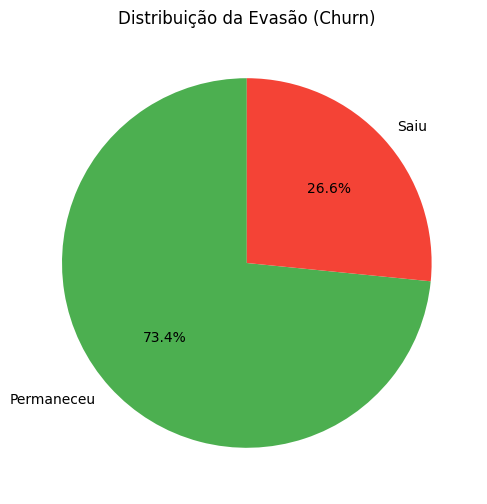

In [18]:
import matplotlib.pyplot as plt

churn_counts = df['Churn'].value_counts()
labels = ['Permaneceu', 'Saiu']

plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', colors=['#4CAF50','#F44336'], startangle=90)
plt.title('Distribuição da Evasão (Churn)')
plt.show()


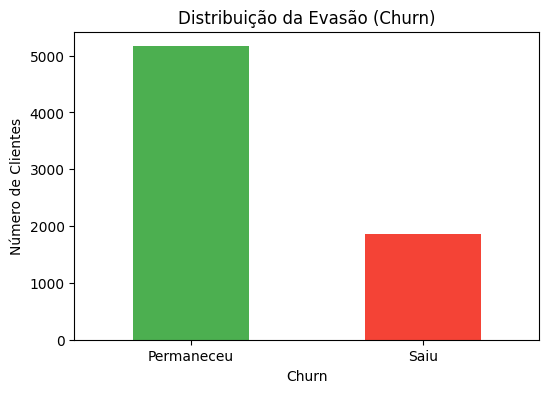

In [19]:
plt.figure(figsize=(6,4))
churn_counts.plot(kind='bar', color=['#4CAF50','#F44336'])
plt.xticks(ticks=[0,1], labels=['Permaneceu','Saiu'], rotation=0)
plt.ylabel('Número de Clientes')
plt.title('Distribuição da Evasão (Churn)')
plt.show()


In [20]:
categorical_cols = ['Genero','Partner','Dependents','PhoneService','Linhas_Adicionais',
                    'Tipo_Internet','OnlineSecurity','OnlineBackup','DeviceProtection',
                    'TechSupport','StreamingTV','StreamingMovies','Tipo_Contrato',
                    'PaperlessBilling','Metodo_Pagamento']
for col in categorical_cols:
    print(f"\nChurn por {col}:")
    display(df.groupby(col)['Churn'].value_counts(normalize=True).unstack() * 100)



Churn por Genero:


Churn,0,1
Genero,,
Female,73.040482,26.959518
Male,73.795435,26.204565



Churn por Partner:


Churn,0,1
Partner,,
0,67.023908,32.976092
1,80.282935,19.717065



Churn por Dependents:


Churn,0,1
Dependents,,
0,68.720860,31.279140
1,84.468795,15.531205



Churn por PhoneService:


Churn,0,1
PhoneService,,
0,75.000000,25.000000
1,73.252519,26.747481



Churn por Linhas_Adicionais:


Churn,0,1
Linhas_Adicionais,,
No,74.932349,25.067651
Yes,71.351534,28.648466



Churn por Tipo_Internet:


Churn,0,1
Tipo_Internet,,
Dsl,81.001656,18.998344
Fiber Optic,58.107235,41.892765
No,92.565789,7.434211



Churn por OnlineSecurity:


Churn,0,1
OnlineSecurity,,
0,68.626669,31.373331
1,85.359801,14.640199



Churn por OnlineBackup:


Churn,0,1
OnlineBackup,,
0,70.78359,29.21641
1,78.43299,21.56701



Churn por DeviceProtection:


Churn,0,1
DeviceProtection,,
0,71.304725,28.695275
1,77.460711,22.539289



Churn por TechSupport:


Churn,0,1
TechSupport,,
0,68.770032,31.229968
1,84.803922,15.196078



Churn por StreamingTV:


Churn,0,1
StreamingTV,,
0,75.629476,24.370524
1,69.885313,30.114687



Churn por StreamingMovies:


Churn,0,1
StreamingMovies,,
0,75.563822,24.436178
1,70.047602,29.952398



Churn por Tipo_Contrato:


Churn,0,1
Tipo_Contrato,,
Month To Month,57.290323,42.709677
One Year,88.722826,11.277174
Two Year,97.151335,2.848665



Churn por PaperlessBilling:


Churn,0,1
PaperlessBilling,,
0,83.624302,16.375698
1,66.410749,33.589251



Churn por Metodo_Pagamento:


Churn,0,1
Metodo_Pagamento,,
Bank Transfer (Automatic),83.268482,16.731518
Credit Card (Automatic),84.746877,15.253123
Electronic Check,54.714588,45.285412
Mailed Check,80.798005,19.201995


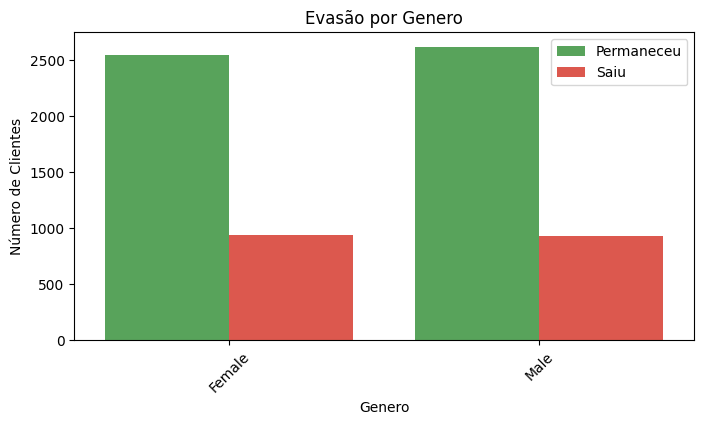

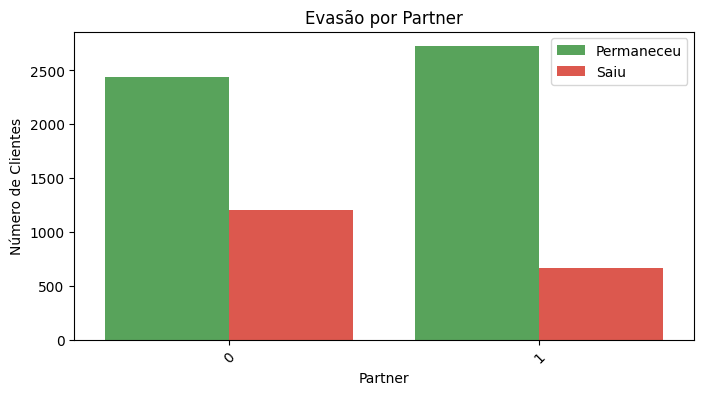

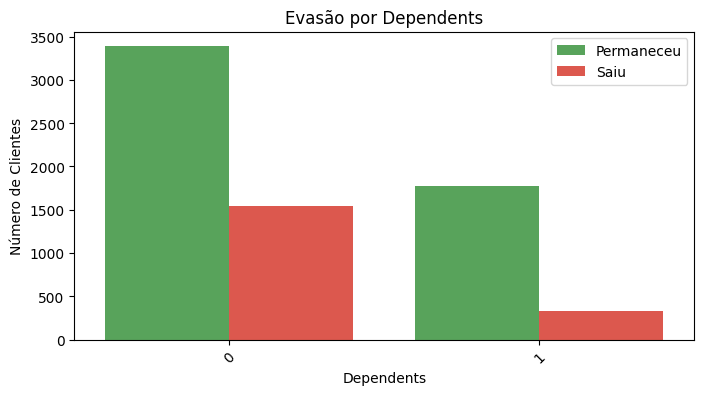

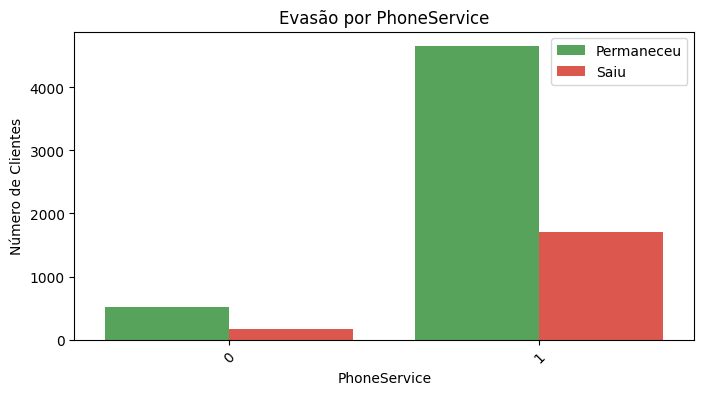

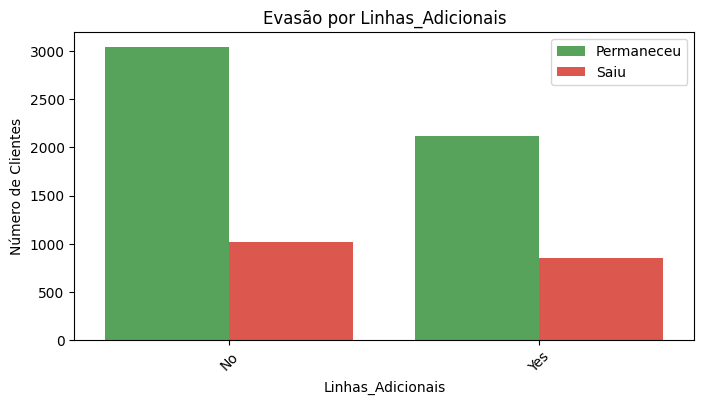

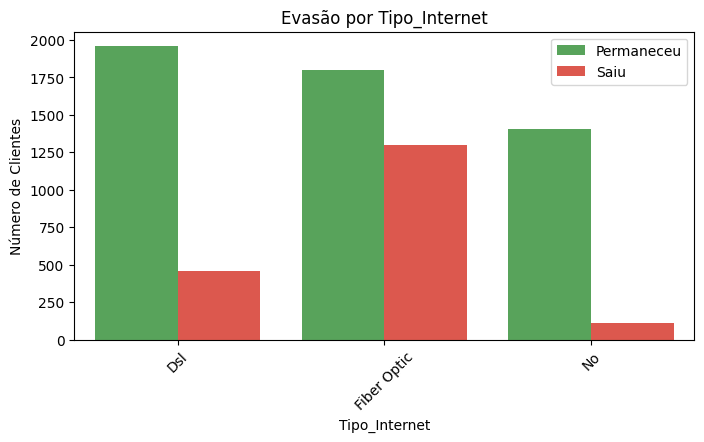

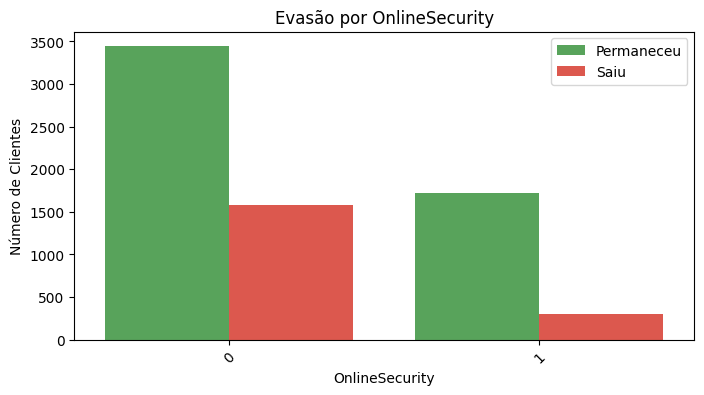

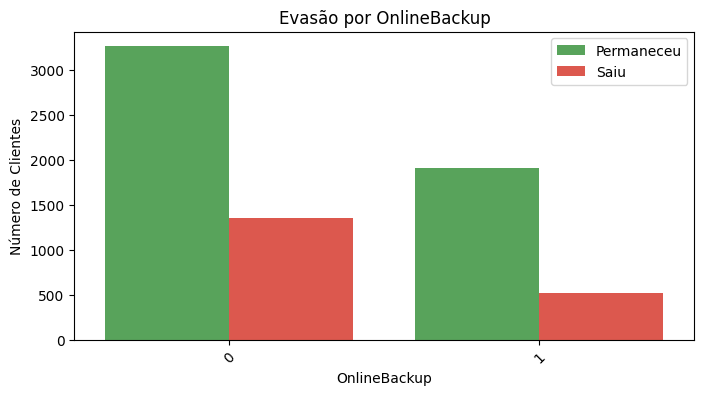

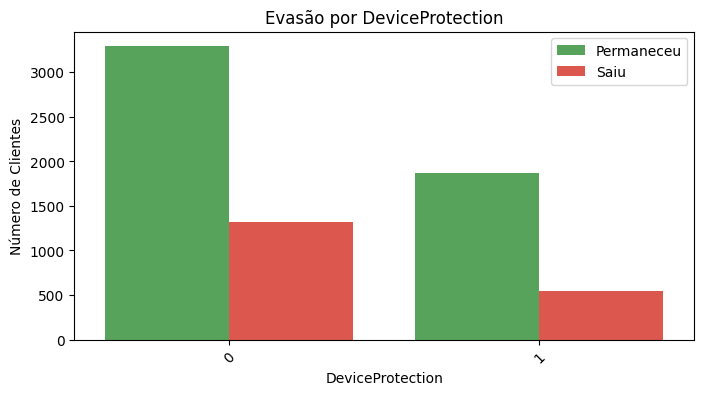

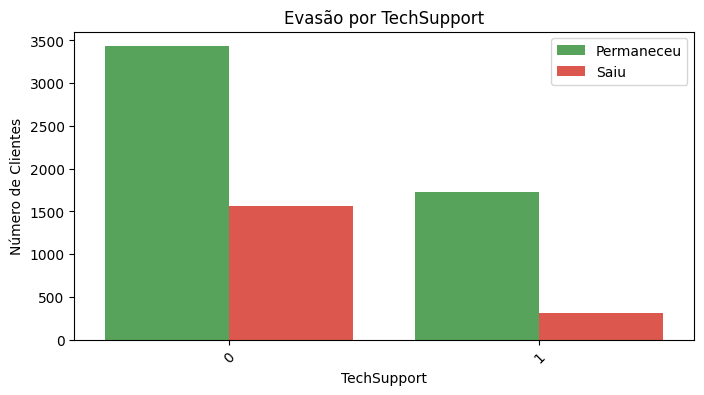

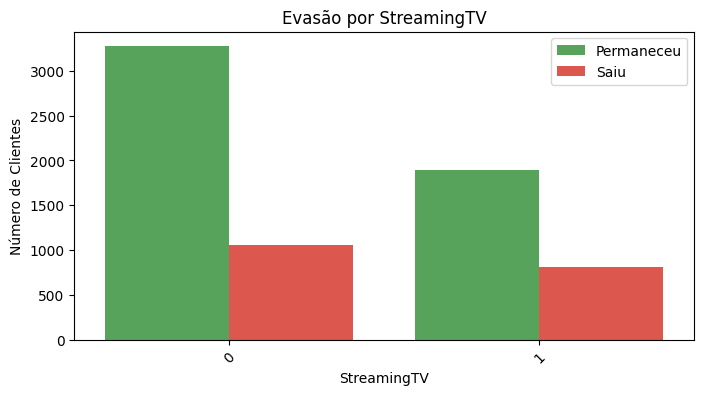

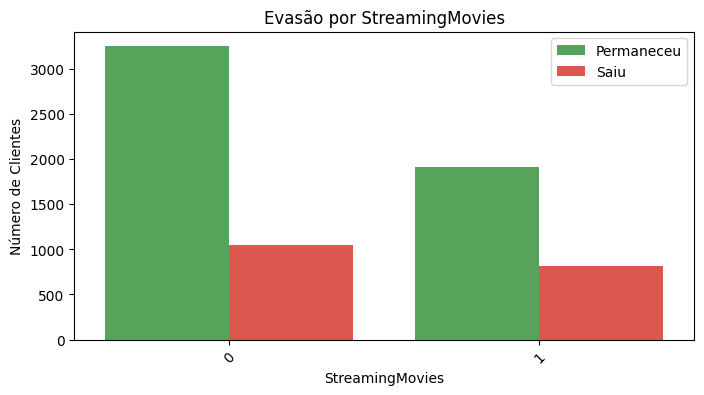

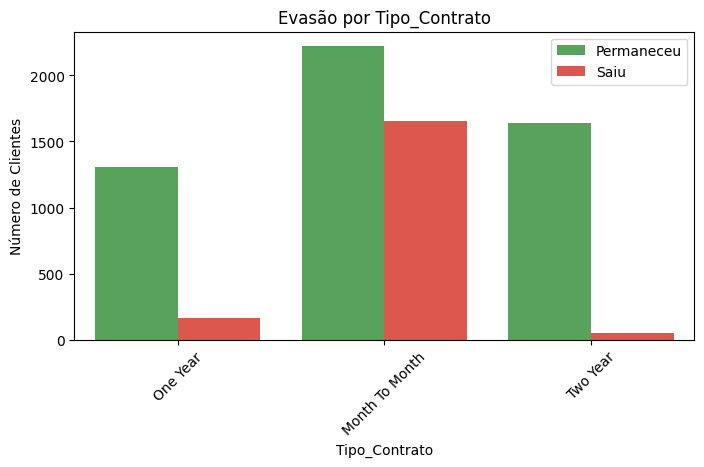

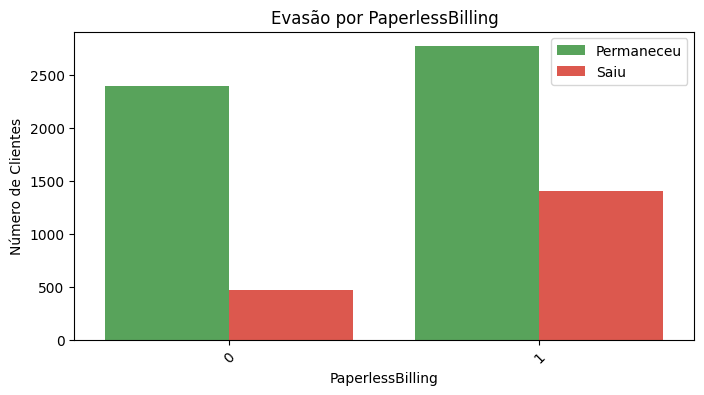

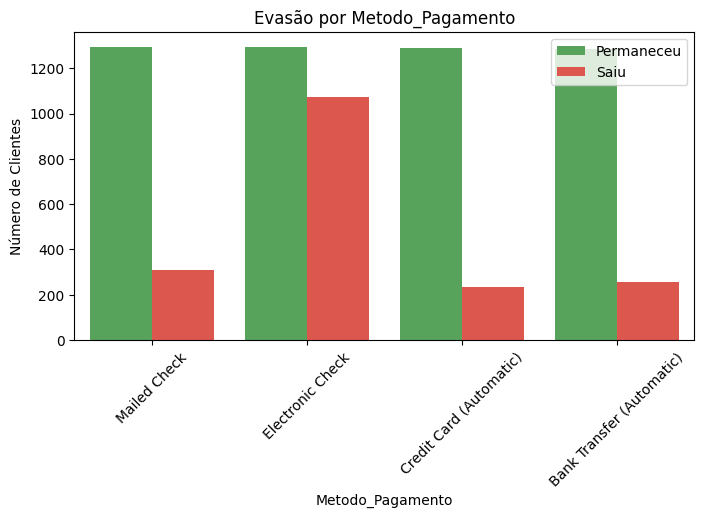

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue='Churn', data=df, palette=['#4CAF50','#F44336'])
    plt.title(f'Evasão por {col}')
    plt.ylabel('Número de Clientes')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.legend(labels=['Permaneceu','Saiu'])
    plt.show()


In [22]:
# Agrupando por Churn e calculando estatísticas
df.groupby('Churn')[numerical_cols].describe().T

Churn                                 0            1
Idoso                count  5163.000000  1869.000000
                     mean      0.128995     0.254682
                     std       0.335227     0.435799
                     min       0.000000     0.000000
                     25%       0.000000     0.000000
                     50%       0.000000     0.000000
                     75%       0.000000     1.000000
                     max       1.000000     1.000000
Tempo_Contrato_Meses count  5163.000000  1869.000000
                     mean     37.650010    17.979133
                     std      24.076940    19.531123
                     min       1.000000     1.000000
                     25%      15.000000     2.000000
                     50%      38.000000    10.000000
                     75%      61.000000    29.000000
                     max      72.000000    72.000000
Faturamento_Mensal   count  5163.000000  1869.000000
                     mean     61.307408    74.441332
                     std      31.094557    24.666053
                     min      18.250000    18.850000
                     25%      25.100000    56.150000
                     50%      64.450000    79.650000
                     75%      88.475000    94.200000
                     max     118.750000   118.350000
Faturamento_Total    count  5163.000000  1869.000000
                     mean   2555.344141  1531.796094
                     std    2329.456984  1890.822994
                     min      18.800000    18.850000
                     25%     577.825000   134.500000
                     50%    1683.600000   703.550000
                     75%    4264.125000  2331.300000
                     max    8672.450000  8684.800000
Faturamento_Diario   count  5163.000000  1869.000000
                     mean      2.043580     2.481378
                     std       1.036485     0.822202
                     min       0.608333     0.628333
                     25%       0.836667     1.871667
                     50%       2.148333     2.655000
                     75%       2.949167     3.140000
                     max       3.958333     3.945000

/tmp/ipython-input-1705542780.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette=['#4CAF50','#F44336'])


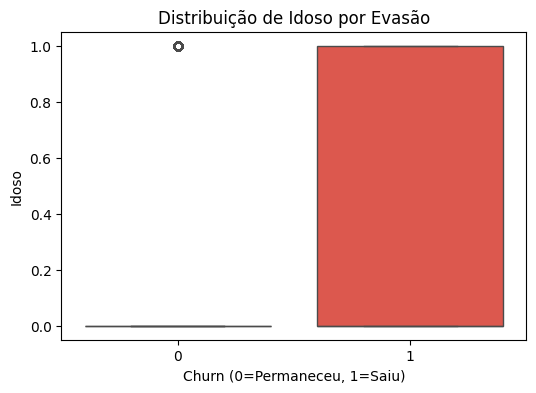

/tmp/ipython-input-1705542780.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette=['#4CAF50','#F44336'])


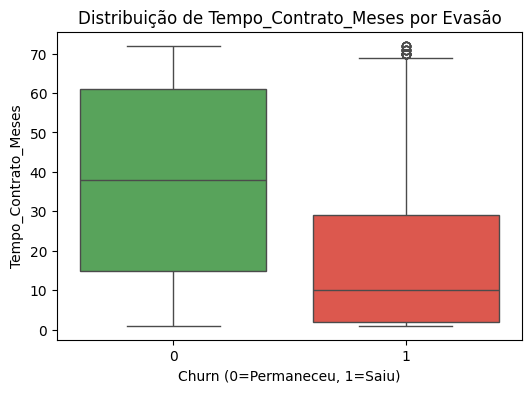

/tmp/ipython-input-1705542780.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette=['#4CAF50','#F44336'])


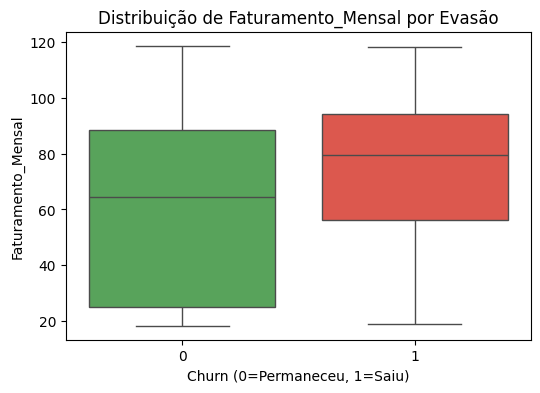

/tmp/ipython-input-1705542780.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette=['#4CAF50','#F44336'])


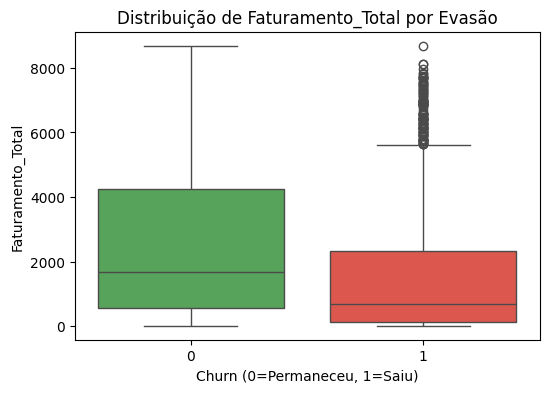

/tmp/ipython-input-1705542780.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette=['#4CAF50','#F44336'])


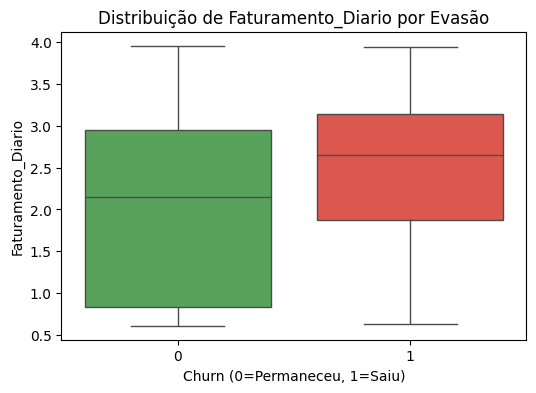

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y=col, data=df, palette=['#4CAF50','#F44336'])
    plt.title(f'Distribuição de {col} por Evasão')
    plt.xlabel('Churn (0=Permaneceu, 1=Saiu)')
    plt.ylabel(col)
    plt.show()


/tmp/ipython-input-83275585.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn']==0][col], label='Permaneceu', shade=True)
/tmp/ipython-input-83275585.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn']==1][col], label='Saiu', shade=True)


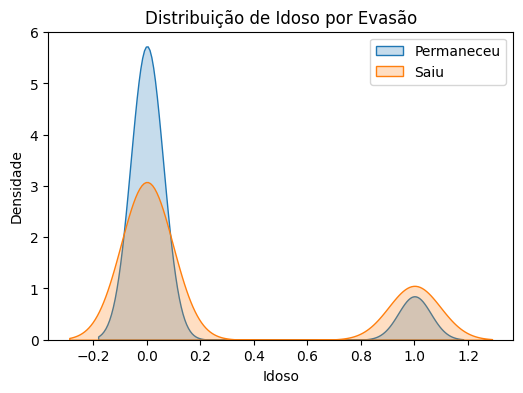

/tmp/ipython-input-83275585.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn']==0][col], label='Permaneceu', shade=True)
/tmp/ipython-input-83275585.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn']==1][col], label='Saiu', shade=True)


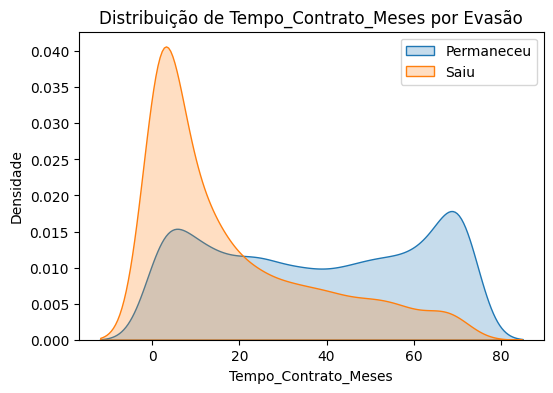

/tmp/ipython-input-83275585.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn']==0][col], label='Permaneceu', shade=True)
/tmp/ipython-input-83275585.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn']==1][col], label='Saiu', shade=True)


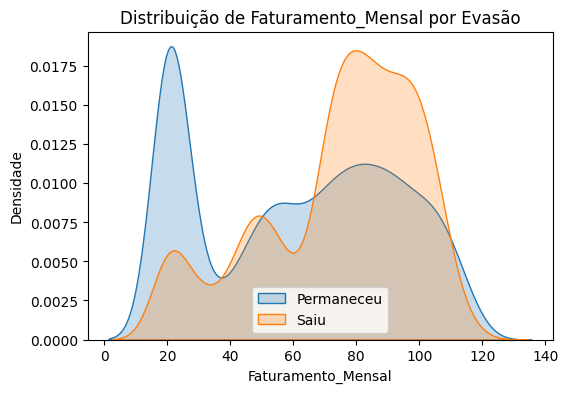

/tmp/ipython-input-83275585.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn']==0][col], label='Permaneceu', shade=True)
/tmp/ipython-input-83275585.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn']==1][col], label='Saiu', shade=True)


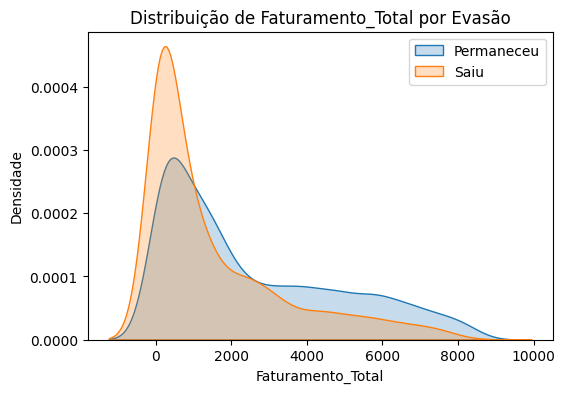

/tmp/ipython-input-83275585.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn']==0][col], label='Permaneceu', shade=True)
/tmp/ipython-input-83275585.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn']==1][col], label='Saiu', shade=True)


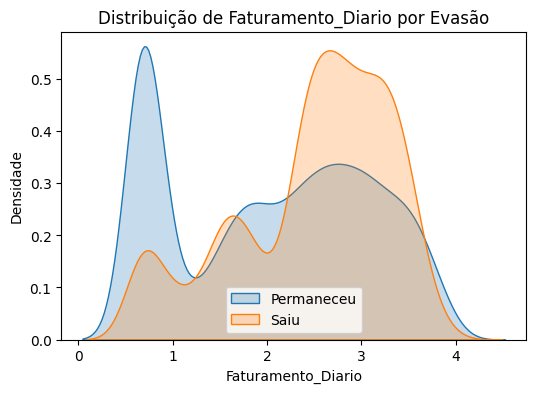

In [24]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df[df['Churn']==0][col], label='Permaneceu', shade=True)
    sns.kdeplot(df[df['Churn']==1][col], label='Saiu', shade=True)
    plt.title(f'Distribuição de {col} por Evasão')
    plt.xlabel(col)
    plt.ylabel('Densidade')
    plt.legend()
    plt.show()


#📄Relatorio Final

# 📊 Relatório Final - Challenge 2 (TelecomX)

## 1. Introdução
A empresa **TelecomX** busca compreender os principais fatores relacionados à evasão de clientes (**Churn**) em seus serviços. Este relatório apresenta as etapas de **limpeza dos dados**, **análise exploratória (EDA)** e **visualizações**, seguidas de conclusões e recomendações estratégicas.

A base de dados foi fornecida em formato **JSON**, contendo informações de clientes, serviços de telefonia, internet e dados financeiros. O objetivo principal é identificar padrões e variáveis relevantes para prever e mitigar a evasão.

---

## 2. Preparação e Limpeza dos Dados

As seguintes etapas foram realizadas:

- **Caregamento e normalização** das tabelas (`customer`, `phone`, `internet`, `account`).
- **Junção** em um único DataFrame principal.
- **Padronização de strings** (remoção de espaços, unificação de maiúsculas/minúsculas).
- **Tratamento de valores faltantes e inconsistentes**:
  - Substituição de valores vazios em `Churn` por `NaN` e remoção.
  - Conversão de `Charges.Total` para valores numéricos.
  - Padronização de categorias como `No Internet Service → No`.
- **Criação da variável derivada** `Faturamento_Diario` = `Charges.Monthly` / 30.
- **Codificação binária** de variáveis categóricas (Yes/No → 1/0).
- **Renomeação de colunas** para maior clareza (ex.: `Contract → Tipo_Contrato`).

Após limpeza, não restaram valores nulos e o dataset ficou pronto para análise.

---

## 3. Análise Exploratória dos Dados (EDA)

### 3.1 Distribuição do Churn
- Aproximadamente **26% dos clientes saíram** da empresa.
- A evasão está desbalanceada: a maioria (74%) permaneceu.

### 3.2 Variáveis Categóricas e Churn
- **Tipo de Contrato**: clientes com **contrato mensal** apresentam taxas de evasão muito maiores do que contratos anuais ou bienais.
- **Serviços de Internet**: clientes com **Fiber Optic** têm maior evasão do que os que usam **DSL**.
- **Serviços adicionais (OnlineSecurity, TechSupport, etc.)**: ausência destes serviços aumenta significativamente o risco de evasão.
- **Método de Pagamento**: clientes que usam **Electronic Check** apresentam maior evasão em comparação a cartões ou transferências automáticas.

### 3.3 Variáveis Numéricas e Churn
- **Tempo de Contrato (tenure)**: clientes que saem têm em média **menor tempo de permanência**.
- **Faturamento Mensal**: clientes que saíram apresentam valores médios mais altos.
- **Faturamento Total**: clientes que permanecem tendem a acumular maior faturamento total, reflexo da permanência mais longa.

### 3.4 Visualizações
Foram gerados os seguintes gráficos para interpretação:
- Gráfico de pizza e barras para **distribuição do Churn**.
- Countplots mostrando a evasão por **variáveis categóricas**.
- Boxplots e KDEs para analisar a distribuição de **variáveis numéricas** entre clientes que saíram e os que permaneceram.

---

## 4. Conclusões
A análise evidenciou alguns padrões importantes:
1. **Contratos mensais aumentam a evasão**, sugerindo que clientes de longo prazo são mais fiéis.
2. **Serviços adicionais (suporte técnico, segurança online, backup, etc.) reduzem a evasão**.
3. **Clientes de alto faturamento mensal** estão mais propensos a sair, possivelmente devido ao custo elevado.
4. **Clientes com menor tempo de contrato (novos)** apresentam maior risco de evasão.
5. **Métodos de pagamento eletrônicos (Electronic Check)** estão associados a maior churn.

---

## 5. Recomendações Estratégicas
- **Incentivar contratos de longo prazo** (ex.: descontos para contratos anuais/bienais).
- **Oferecer pacotes promocionais de serviços adicionais** (segurança, suporte técnico, backup).
- **Revisar a política de preços** para clientes de alto faturamento mensal, criando planos personalizados.
- **Acompanhar clientes novos** com estratégias de engajamento no início do contrato.
- **Incentivar formas de pagamento mais estáveis** (cartão, débito automático), oferecendo benefícios.

---

## 6. Próximos Passos
- Construção de **modelos preditivos de Churn** (árvores de decisão, regressão logística, etc.).
- Implementação de **dashboards interativos** para monitoramento em tempo real.
- Aplicação de **técnicas de segmentação de clientes** (clustering) para personalização de ofertas.

---

📌 **Resumo**: A evasão da TelecomX está fortemente ligada a contratos de curto prazo, ausência de serviços adicionais e altos custos mensais. Estratégias de fidelização e customização de planos podem reduzir significativamente a saída de clientes.

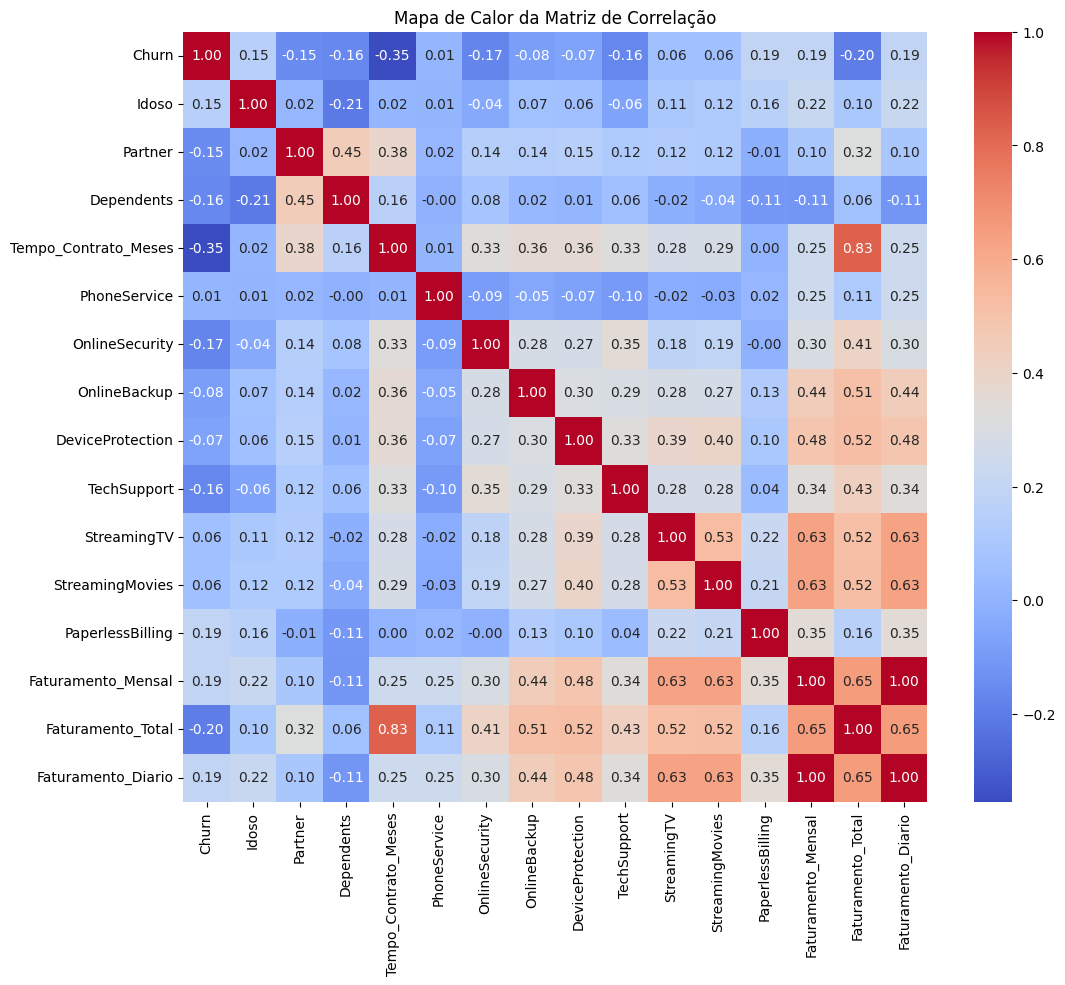

In [25]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 10))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor da Matriz de Correlação')
plt.show()